# Convolution Neural Network

CNN allow us to extract the features of the image while maintaining the spatial arrangement of the image. 

They use three concepts to create a feature transformation
- **Convolutional layers** multiply kernel value by the image window and optimize the kernel weights over time using gradient descent
- **Pooling layers** describe a window of an image using a single value which is the max or the average of that window
- **Activation layers** squash the values into a range, typically [0,1] or [-1,1]

Params for each type
- **Convolution**: Kernel, Filters, Padding, Stride
- **Pooling**: Max, 
- **Activation**: Relu, Sigmoid, ...

In [1]:
import numpy as np
import keras
import tensorflow as tf
import imageio
import matplotlib.pyplot as plt
% matplotlib inline

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, Dropout
from keras import backend as K
from keras.optimizers import SGD

In [3]:
from helpers import visualise_conv

## Building Intution

### With Convolution

(426, 640, 3)

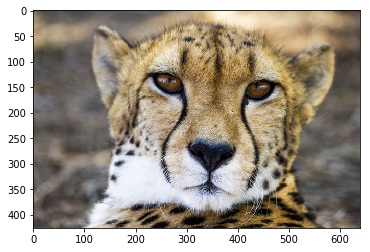

In [4]:
cheetah = imageio.imread("img/cheetah.jpg")
plt.imshow(cheetah)
cheetah.shape

In [5]:
model1 = Sequential()
model1.add(Conv2D(1, (3, 3), input_shape=cheetah.shape))

(426, 640, 3)
(424, 638)


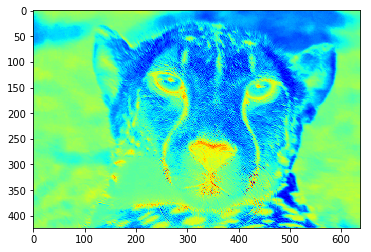

In [6]:
visualise_conv(cheetah, model1)

### With Convolution + Activation

In [7]:
model2 = Sequential()
model2.add(Conv2D(1, (3, 3), input_shape=cheetah.shape))
model2.add(Activation("relu"))

In [8]:
#visualise_conv(cheetah, model2)

### With Convolution + Pooling

In [9]:
model3 = Sequential()
model3.add(Conv2D(1, (8, 8), input_shape=cheetah.shape))
model3.add(MaxPooling2D(pool_size=(2,2)))

(426, 640, 3)
(209, 316)


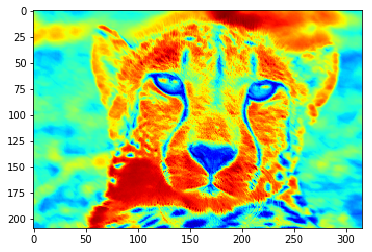

In [10]:
visualise_conv(cheetah, model3)

## Convolution + Activation + Pooling

In [11]:
model4 = Sequential()
model4.add(Conv2D(1, (8, 8), input_shape=cheetah.shape))
model4.add(Activation("relu"))
model4.add(MaxPooling2D(pool_size=(2,2)))

(426, 640, 3)
(209, 316)


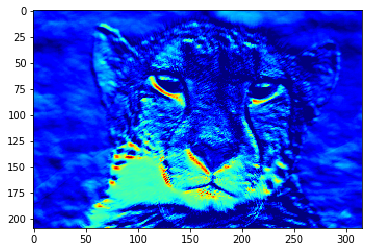

In [12]:
visualise_conv(cheetah, model4)

## Get Data

In [13]:
from keras.datasets import fashion_mnist
from helpers import fashion_mnist_label

In [14]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [15]:
batch_size = 128
num_classes = 10
epochs=10

**Step 1: Prepare the images and labels**

Convert from 'uint8' to 'float32' and normalise the data to (0,1) 

In [16]:
# input image dimensions
img_rows, img_cols = 28, 28

In [17]:
K.image_data_format()

'channels_last'

In [18]:
x_train_conv = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test_conv = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
input_shape = (img_rows, img_cols, 1)

In [19]:
x_train_conv =  x_train_conv / 255
x_test_conv = x_test_conv / 255

Convert class vectors to binary class matrices

In [20]:
# convert class vectors to binary class matrices
y_train_class = keras.utils.to_categorical(y_train, num_classes)
y_test_class = keras.utils.to_categorical(y_test, num_classes)

## Model 1: Simple Convolution

**Step 2 & 3: Craft the feature transfomation and classifier model **

In [21]:
model_simple_conv = Sequential()
model_simple_conv.add(Conv2D(1, (3, 3), activation ="relu", input_shape=(28, 28, 1)))
model_simple_conv.add(Flatten())
model_simple_conv.add(Dense(100, activation='relu'))
model_simple_conv.add(Dense(10, activation='softmax'))

In [22]:
model_simple_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 26, 26, 1)         10        
_________________________________________________________________
flatten_1 (Flatten)          (None, 676)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               67700     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 68,720
Trainable params: 68,720
Non-trainable params: 0
_________________________________________________________________


**Step 4: Compile and fit the model**

In [23]:
model_simple_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [24]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/simple-conv')

In [25]:
%%time 
model_simple_conv.fit(x_train_conv, y_train_class, batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(x_test_conv, y_test_class),
                    callbacks=[tbCallBack])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.8988 - acc: 0.6892 - val_loss: 0.6288 - val_acc: 0.7765
Epoch 2/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.5799 - acc: 0.7974 - val_loss: 0.5437 - val_acc: 0.8114
Epoch 3/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.5219 - acc: 0.8189 - val_loss: 0.5114 - val_acc: 0.8247
Epoch 4/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4848 - acc: 0.8313 - val_loss: 0.5136 - val_acc: 0.8175
Epoch 5/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4642 - acc: 0.8382 - val_loss: 0.4806 - val_acc: 0.8330
Epoch 6/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4462 - acc: 0.8439 - val_loss: 0.4576 - val_acc: 0.8412
Epoch 7/10
60000/60000 [==============================] - 5s 88us/step - loss: 0.4327 - acc: 0.8498 - val_loss: 0.4860 - val_acc

**Step 5: Check the performance of the model**

In [26]:
score = model_simple_conv.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 1s 91us/step


In [27]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4399490789651871
Test accuracy: 0.8459


**Step 6: Make & Visualise the Prediction**

In [28]:
model_simple_conv.predict_proba(x_test_conv)[0]

array([5.0656063e-06, 8.2380785e-07, 5.5392538e-06, 3.0605683e-05,
       8.6784430e-06, 6.5039620e-02, 8.6066866e-06, 1.7629379e-01,
       2.5109609e-03, 7.5609636e-01], dtype=float32)

In [29]:
from helpers import plot_prediction

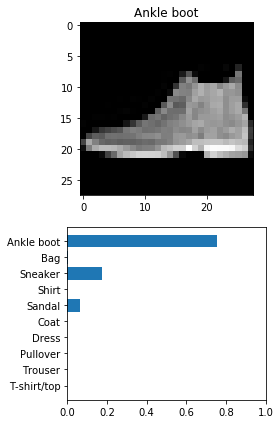

In [30]:
plot_prediction(0, x_test, y_test, x_test_conv, model_simple_conv)

## Model 2: Convulation + Max Pooling

**Step 2 & 3: Craft the feature transfomation and classifier model **

In [31]:
model_pooling_conv = Sequential()
model_pooling_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
model_pooling_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_pooling_conv.add(Flatten())
model_pooling_conv.add(Dense(128, activation='relu'))
model_pooling_conv.add(Dense(num_classes, activation='softmax'))

In [32]:
model_pooling_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 5408)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 128)               692352    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1290      
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
_________________________________________________________________


**Step 4: Compile and fit the model**

In [33]:
model_pooling_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [34]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/pooling-conv')

In [35]:
%%time 
model_pooling_conv.fit(x_train_conv, y_train_class, batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(x_test_conv, y_test_class),
                    callbacks=[tbCallBack])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 12s 197us/step - loss: 1.0275 - acc: 0.6648 - val_loss: 0.6645 - val_acc: 0.7609
Epoch 2/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.5916 - acc: 0.7907 - val_loss: 0.5702 - val_acc: 0.7884
Epoch 3/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.5298 - acc: 0.8099 - val_loss: 0.5331 - val_acc: 0.8061
Epoch 4/10
60000/60000 [==============================] - 12s 196us/step - loss: 0.4983 - acc: 0.8213 - val_loss: 0.4955 - val_acc: 0.8232
Epoch 5/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.4753 - acc: 0.8316 - val_loss: 0.5104 - val_acc: 0.8188
Epoch 6/10
60000/60000 [==============================] - 12s 195us/step - loss: 0.4571 - acc: 0.8380 - val_loss: 0.4822 - val_acc: 0.8278
Epoch 7/10
60000/60000 [==============================] - 12s 197us/step - loss: 0.4444 - acc: 0.8429 - val_loss: 0.

**Step 5: Check the performance of the model**

In [36]:
score = model_pooling_conv.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 2s 162us/step


In [37]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4315742018222809
Test accuracy: 0.8442


**Step 6: Make & Visualise the Prediction**

In [38]:
model_pooling_conv.predict_proba(x_test_conv)[0]

array([9.9808212e-06, 4.4916651e-06, 3.6906811e-05, 1.6018359e-05,
       1.8869974e-05, 3.6937412e-02, 7.4488918e-05, 2.9153290e-01,
       4.7342689e-03, 6.6663468e-01], dtype=float32)

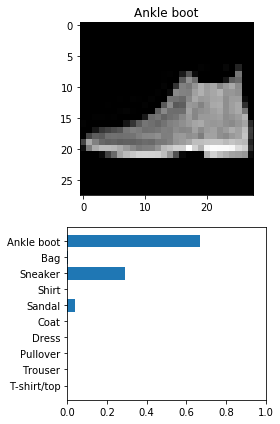

In [39]:
plot_prediction(0, x_test, y_test, x_test_conv, model_pooling_conv)

## Model 3: Convulation + Max Pooling + Dropout

**Step 2 & 3: Craft the feature transfomation and classifier model **

In [40]:
model_dropout_conv = Sequential()
model_dropout_conv.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))
model_dropout_conv.add(Conv2D(64, (3, 3), activation='relu'))
model_dropout_conv.add(MaxPooling2D(pool_size=(2, 2)))
model_dropout_conv.add(Dropout(0.25))
model_dropout_conv.add(Flatten())
model_dropout_conv.add(Dense(128, activation='relu'))
model_dropout_conv.add(Dropout(0.5))
model_dropout_conv.add(Dense(num_classes, activation='softmax'))

In [41]:
model_dropout_conv.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
__________

In [42]:
model_dropout_conv.compile(loss='categorical_crossentropy', optimizer="sgd", metrics=['accuracy'])

In [43]:
tbCallBack = keras.callbacks.TensorBoard(log_dir='logs/dropout-conv')

In [44]:
%%time 
model_dropout_conv.fit(x_train_conv, y_train_class, batch_size=batch_size, epochs=epochs, verbose=1,
                    validation_data=(x_test_conv, y_test_class),
                    callbacks=[tbCallBack])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 43s 709us/step - loss: 1.1519 - acc: 0.5807 - val_loss: 0.6957 - val_acc: 0.7402
Epoch 2/10
60000/60000 [==============================] - 42s 708us/step - loss: 0.7419 - acc: 0.7229 - val_loss: 0.6158 - val_acc: 0.7615
Epoch 3/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.6642 - acc: 0.7501 - val_loss: 0.5626 - val_acc: 0.7894
Epoch 4/10
60000/60000 [==============================] - 42s 707us/step - loss: 0.6223 - acc: 0.7655 - val_loss: 0.5459 - val_acc: 0.7950
Epoch 5/10
60000/60000 [==============================] - 43s 709us/step - loss: 0.5858 - acc: 0.7819 - val_loss: 0.5135 - val_acc: 0.8128
Epoch 6/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.5602 - acc: 0.7922 - val_loss: 0.4928 - val_acc: 0.8170
Epoch 7/10
60000/60000 [==============================] - 42s 705us/step - loss: 0.5391 - acc: 0.7994 - val_loss: 0.

**Step 5: Check the performance of the model**

In [45]:
score = model_dropout_conv.evaluate(x_test_conv, y_test_class, verbose=1)

10000/10000 [==============================] - 3s 340us/step


In [46]:
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.4284448132276535
Test accuracy: 0.8438


**Step 6: Make & Visualise the Prediction**

In [47]:
model_dropout_conv.predict_proba(x_test_conv)[0]

array([1.19789265e-05, 6.88473392e-06, 2.55319974e-05, 5.05130402e-06,
       2.23423467e-05, 2.68606488e-02, 2.50097655e-05, 1.29147708e-01,
       1.43317995e-03, 8.42461646e-01], dtype=float32)

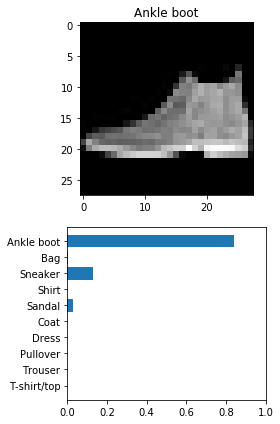

In [48]:
plot_prediction(0, x_test, y_test, x_test_conv, model_dropout_conv)